In [190]:
# to stop warnings
import warnings
warnings.filterwarnings('ignore')
# Importing packages
import numpy as np
import pandas as pd

# CHECKING DATA

In [191]:
# Reading dataset
leads = pd.read_csv('Leads.csv')

In [192]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [193]:
leads.shape

(9240, 37)

In [194]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [195]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [196]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

## DATA PREP

In [197]:
# checking null values
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [198]:
# Droping values greater than 3000 null values
for col in leads.columns:
    if leads[col].isnull().sum() > 3000:
        leads.drop(col, 1, inplace=True)

In [199]:
# Checking null values
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [200]:
# dropping city

In [201]:
leads.drop(['City'], axis = 1, inplace = True)

In [202]:
# dropping country
leads.drop(['Country'], axis = 1, inplace = True)

In [203]:
# checking % of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [204]:
# checking count values

In [205]:
leads['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [206]:
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [207]:
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [208]:
# dropping lead Profile and how did you hear about X Education coz it has high select values

In [209]:
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

In [210]:
# dropping other columns with redundant data

In [211]:
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [212]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [213]:
leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [214]:
leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [215]:
leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [216]:
leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [217]:
leads = leads[~pd.isnull(leads['TotalVisits'])]

In [218]:
leads.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [219]:
leads = leads[~pd.isnull(leads['Lead Source'])]

In [220]:
leads.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [221]:
leads = leads[~pd.isnull(leads['Specialization'])]

In [222]:
leads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [223]:
# checking % of retained data
print(len(leads.index))
print(len(leads.index)/9240)

6373
0.6897186147186147


In [224]:
#69% data is still intact here

In [225]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [226]:
leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [227]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


### Dummy variable creation- dealing with categorical data

In [228]:
# Check coloumn type
temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [229]:
# Create dummy variables 
dummy_1 = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

leads = pd.concat([leads, dummy_1], axis=1)

In [230]:
dummy_spl_1 = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
#dummy_spl_1 = dummy_spl.drop(['Specialization_Select'], 1)
leads = pd.concat([leads, dummy_spl_1], axis = 1)

In [231]:

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [232]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


### Test-Train Split

In [233]:
from sklearn.model_selection import train_test_split

In [234]:
# Putting all the feature variables in X
X = leads.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [235]:
# Put the target variable in y

y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [236]:
# Split dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling Dataset

In [237]:
from sklearn.preprocessing import MinMaxScaler

In [238]:
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Checking correlations

In [239]:
leads.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Converted,1.000000,0.005651,0.313338,-0.063362,-0.117563,0.288666,-0.019269,-0.133600,-0.021207,0.020205,...,-0.024789,0.049520,-0.000862,0.031349,-0.018603,0.006964,-0.093559,-0.005142,0.005785,-0.011762
TotalVisits,0.005651,1.000000,0.202551,0.489039,0.267954,-0.208375,-0.043000,0.075252,-0.042052,0.085306,...,0.028630,-0.000493,0.038725,0.008929,0.014223,0.068015,-0.208327,0.015114,0.063383,0.064384
Total Time Spent on Website,0.313338,0.202551,1.000000,0.303870,0.275606,-0.249493,-0.061429,0.114088,-0.060945,0.227496,...,0.011056,0.052437,0.043356,0.050860,0.024919,0.018767,-0.253959,0.003203,0.045386,0.037867
Page Views Per Visit,-0.063362,0.489039,0.303870,1.000000,0.458168,-0.340185,-0.065739,0.109785,-0.062896,0.183735,...,0.057990,0.017799,0.063772,0.030364,0.026099,0.027465,-0.331176,0.015230,0.052972,0.111284
Lead Origin_Landing Page Submission,-0.117563,0.267954,0.275606,0.458168,1.000000,-0.363764,-0.074917,0.508857,-0.071507,0.067225,...,0.089105,0.084975,0.093730,0.095849,0.070983,0.050077,-0.688526,0.039433,0.111610,0.094875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Rural and Agribusiness,0.006964,0.068015,0.018767,0.027465,0.050077,-0.018872,-0.006251,0.021596,-0.006366,-0.037642,...,-0.014152,-0.032656,-0.015429,-0.024501,-0.010668,1.000000,-0.061011,-0.006014,-0.020352,-0.014828
Specialization_Select,-0.093559,-0.208327,-0.253959,-0.331176,-0.688526,0.072725,0.027800,-0.347613,0.031028,-0.034601,...,-0.094008,-0.216932,-0.102490,-0.162761,-0.070865,-0.061011,1.000000,-0.039952,-0.135194,-0.098501
Specialization_Services Excellence,-0.005142,0.015114,0.003203,0.015230,0.039433,-0.011155,-0.004093,0.053189,-0.004169,-0.027058,...,-0.009267,-0.021384,-0.010103,-0.016044,-0.006986,-0.006014,-0.039952,1.000000,-0.013327,-0.009710
Specialization_Supply Chain Management,0.005785,0.063383,0.045386,0.052972,0.111610,-0.035065,-0.001963,0.093536,-0.002431,-0.027074,...,-0.031358,-0.072362,-0.034188,-0.054292,-0.023639,-0.020352,-0.135194,-0.013327,1.000000,-0.032857


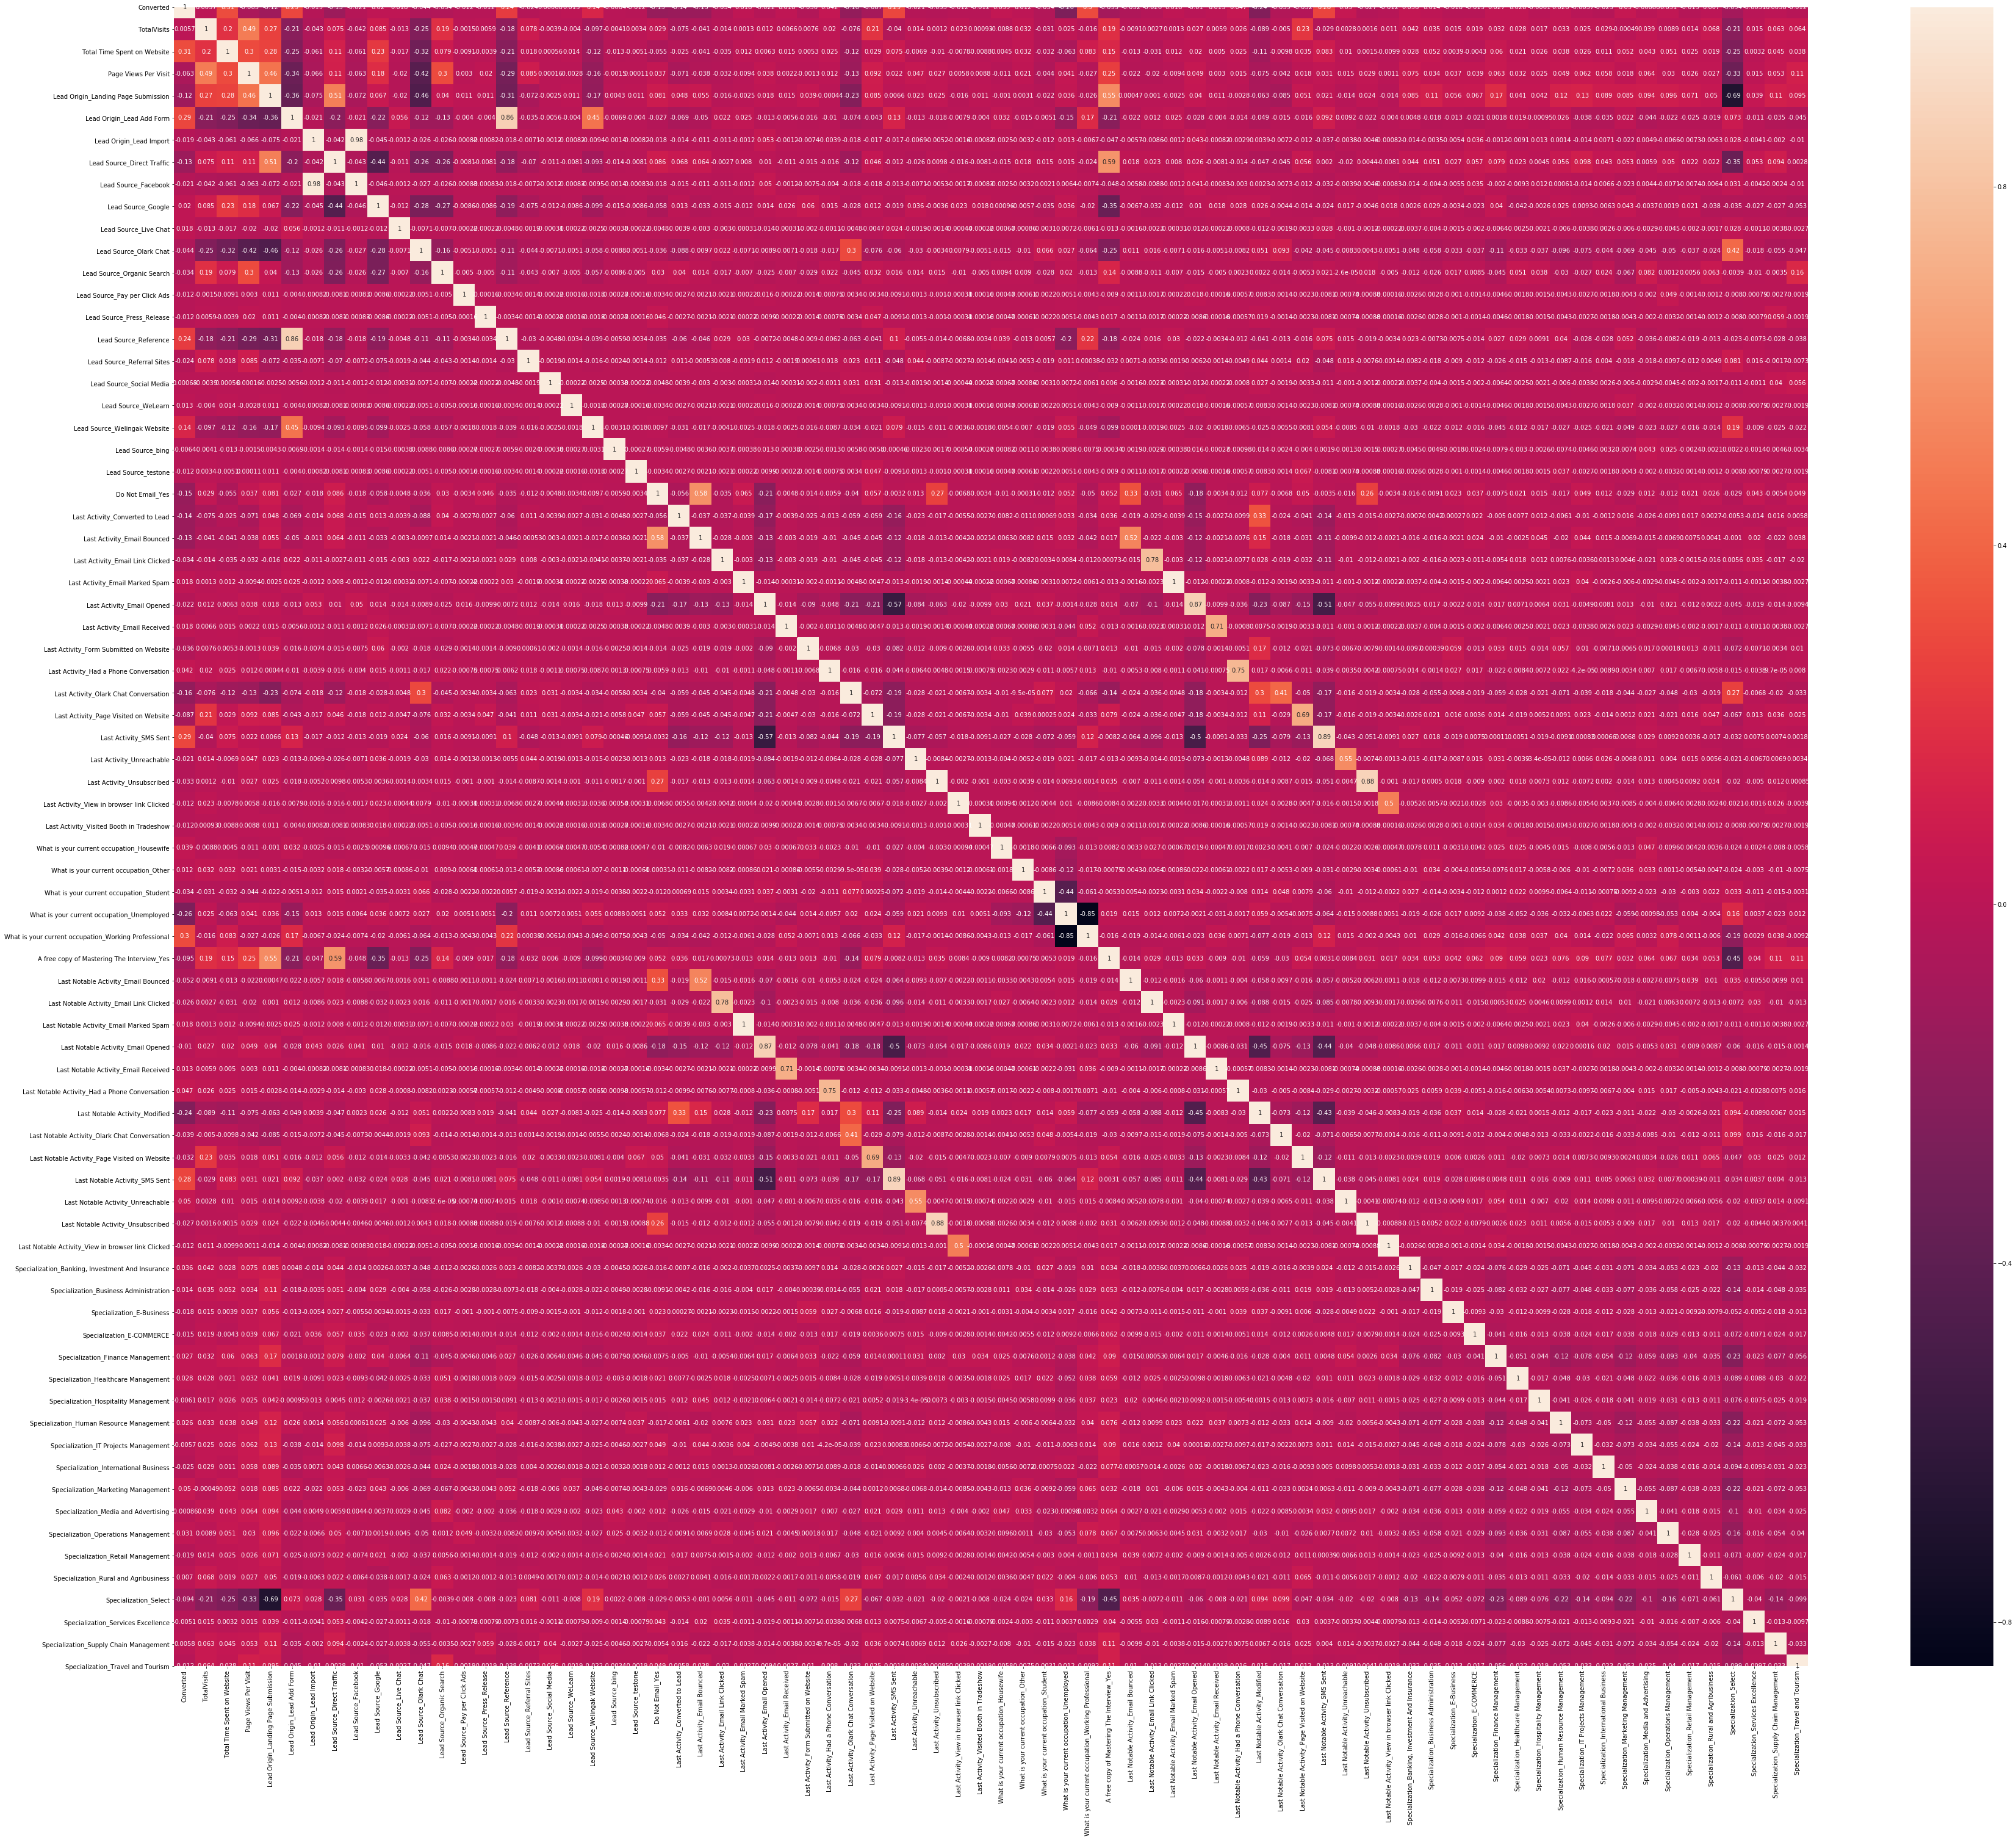

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (60,50))        
sns.heatmap(leads.corr(),annot = True)
plt.show()

##  Model Building

In [241]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [242]:
# Importing RFE and selectinh 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [243]:
# checking for features selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 15),
 ('Lead Source_Facebook', False, 48),
 ('Lead Source_Google', False, 38),
 ('Lead Source_Live Chat', False, 30),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 37),
 ('Lead Source_Pay per Click Ads', False, 35),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 39),
 ('Lead Source_Social Media', False, 61),
 ('Lead Source_WeLearn', False, 23),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 19),
 ('Lead Source_testone', False, 31),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 11),
 ('Last Activity_Email Bounced', False, 7),
 ('Last Activity_Email Link 

In [244]:
# Putting all the columns selected by RFE in one variable 'col_1'
col_1 = X_train.columns[rfe.support_]

In [245]:
# creating a logistic regression model 

In [246]:
# Selecting only columns selected by RFE
X_train = X_train[col_1]

In [247]:
# Importing statsmodels
import statsmodels.api as sm

In [248]:
# Fitting logistic Regression model on X_train 
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2067.2
Date:                Sun, 08 Mar 2020   Deviance:                       4134.4
Time:                        13:34:07   Pearson chi2:                 4.83e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9490      0.603     -1.573      0.116      -2.131       0.233
TotalVisits                                             10.2343      2.636      3.882      0.000       5.068      15.401
Total Time Spent on Website                              4.4045      0.186     23.735      0.000       4.041       4.768
Lead Origin_Lead Add Form                                4.2361      0.259     16.363      0.000       3.729       4.744
Lead Source_Olark Chat                                   1.6324      0.133     12.267      0.000       1.372       1.893
Lead Source_Welingak Website                             2.3444      1.038      2.258      0.024       0.310       4.379
Do Not Email_Yes                                        -1.5177      0.192     -7.892      0.000      -1.895      -1.141
Last Activity_Had a Phone Conversation                   1.1713      0.987      1.186      0.235      -0.764       3.106
Last Activity_SMS Sent                                   1.1787      0.082     14.305      0.000       1.017       1.340
What is your current occupation_Housewife               22.6104   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1260      0.634     -1.776      0.076      -2.369       0.117
What is your current occupation_Unemployed              -1.2968      0.598     -2.169      0.030      -2.468      -0.125
What is your current occupation_Working Professional     1.2483      0.627      1.992      0.046       0.020       2.476
Last Notable Activity_Had a Phone Conversation          23.0106   2.09e+04      0.001      0.999   -4.09e+04     4.1e+04
Last Notable Activity_Unreachable                        2.7670      0.807      3.429      0.001       1.186       4.348
Specialization_Select                                   -0.3400      0.098     -3.464      0.001      -0.532      -0.148
========================================================================================================================
"""

In [249]:
# lookin for VIF

In [250]:
# Import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [251]:
# Making VIF dataframe 

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,4.13
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.39
14,Specialization_Select,1.90
2,Lead Origin_Lead Add Form,1.71
3,Lead Source_Olark Chat,1.66
0,TotalVisits,1.63
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56


In [252]:
# Refiting model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2067.2
Date:                Sun, 08 Mar 2020   Deviance:                       4134.4
Time:                        13:34:07   Pearson chi2:                 4.83e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9490      0.603     -1.573      0.116      -2.131       0.233
TotalVisits                                             10.2343      2.636      3.882      0.000       5.068      15.401
Total Time Spent on Website                              4.4045      0.186     23.735      0.000       4.041       4.768
Lead Origin_Lead Add Form                                4.2361      0.259     16.363      0.000       3.729       4.744
Lead Source_Olark Chat                                   1.6324      0.133     12.267      0.000       1.372       1.893
Lead Source_Welingak Website                             2.3444      1.038      2.258      0.024       0.310       4.379
Do Not Email_Yes                                        -1.5177      0.192     -7.892      0.000      -1.895      -1.141
Last Activity_Had a Phone Conversation                   1.1713      0.987      1.186      0.235      -0.764       3.106
Last Activity_SMS Sent                                   1.1787      0.082     14.305      0.000       1.017       1.340
What is your current occupation_Housewife               22.6104   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1260      0.634     -1.776      0.076      -2.369       0.117
What is your current occupation_Unemployed              -1.2968      0.598     -2.169      0.030      -2.468      -0.125
What is your current occupation_Working Professional     1.2483      0.627      1.992      0.046       0.020       2.476
Last Notable Activity_Had a Phone Conversation          23.0106   2.09e+04      0.001      0.999   -4.09e+04     4.1e+04
Last Notable Activity_Unreachable                        2.7670      0.807      3.429      0.001       1.186       4.348
Specialization_Select                                   -0.3400      0.098     -3.464      0.001      -0.532      -0.148
========================================================================================================================
"""

In [253]:
# VIFs are now all less than 5. So dropping the ones with high p-values ie Last Notable Activity_Had a Phone Conversation

In [254]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [255]:
# Refitting the model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2069.8
Date:                Sun, 08 Mar 2020   Deviance:                       4139.6
Time:                        13:34:07   Pearson chi2:                 4.84e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9489      0.603     -1.573      0.116      -2.131       0.233
TotalVisits                                             10.3097      2.639      3.907      0.000       5.138      15.481
Total Time Spent on Website                              4.3972      0.185     23.710      0.000       4.034       4.761
Lead Origin_Lead Add Form                                4.2368      0.259     16.365      0.000       3.729       4.744
Lead Source_Olark Chat                                   1.6359      0.133     12.290      0.000       1.375       1.897
Lead Source_Welingak Website                             2.3482      1.038      2.262      0.024       0.313       4.383
Do Not Email_Yes                                        -1.5182      0.192     -7.896      0.000      -1.895      -1.141
Last Activity_Had a Phone Conversation                   2.7613      0.800      3.452      0.001       1.193       4.329
Last Activity_SMS Sent                                   1.1786      0.082     14.307      0.000       1.017       1.340
What is your current occupation_Housewife               21.6107   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1240      0.634     -1.773      0.076      -2.366       0.118
What is your current occupation_Unemployed              -1.2945      0.598     -2.166      0.030      -2.466      -0.123
What is your current occupation_Working Professional     1.2477      0.626      1.992      0.046       0.020       2.476
Last Notable Activity_Unreachable                        2.7659      0.807      3.428      0.001       1.185       4.347
Specialization_Select                                   -0.3472      0.098     -3.536      0.000      -0.540      -0.155
========================================================================================================================
"""

In [256]:
# dropping what is your current occupation_Housewife

In [257]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [258]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.0
Date:                Sun, 08 Mar 2020   Deviance:                       4143.9
Time:                        13:34:08   Pearson chi2:                 4.84e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4009      0.556     -0.721      0.471      -1.491       0.689
TotalVisits                                             10.1186      2.624      3.856      0.000       4.975      15.262
Total Time Spent on Website                              4.3951      0.185     23.707      0.000       4.032       4.758
Lead Origin_Lead Add Form                                4.2345      0.259     16.363      0.000       3.727       4.742
Lead Source_Olark Chat                                   1.6319      0.133     12.268      0.000       1.371       1.893
Lead Source_Welingak Website                             2.3476      1.038      2.261      0.024       0.313       4.382
Do Not Email_Yes                                        -1.5207      0.192     -7.901      0.000      -1.898      -1.143
Last Activity_Had a Phone Conversation                   2.7626      0.800      3.454      0.001       1.195       4.330
Last Activity_SMS Sent                                   1.1783      0.082     14.305      0.000       1.017       1.340
What is your current occupation_Student                 -1.6673      0.591     -2.821      0.005      -2.826      -0.509
What is your current occupation_Unemployed              -1.8376      0.552     -3.329      0.001      -2.920      -0.756
What is your current occupation_Working Professional     0.7040      0.583      1.208      0.227      -0.439       1.847
Last Notable Activity_Unreachable                        2.7623      0.807      3.422      0.001       1.180       4.345
Specialization_Select                                   -0.3488      0.098     -3.553      0.000      -0.541      -0.156
========================================================================================================================
"""

In [259]:
# dropping what is your current occupation_Working Professional

In [260]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [261]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.6
Date:                Sun, 08 Mar 2020   Deviance:                       4145.3
Time:                        13:34:08   Pearson chi2:                 4.81e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2371      0.196      1.211      0.226      -0.147       0.621
TotalVisits                                   10.0121      2.618      3.825      0.000       4.882      15.143
Total Time Spent on Website                    4.3957      0.185     23.708      0.000       4.032       4.759
Lead Origin_Lead Add Form                      4.2341      0.259     16.364      0.000       3.727       4.741
Lead Source_Olark Chat                         1.6321      0.133     12.275      0.000       1.371       1.893
Lead Source_Welingak Website                   2.3468      1.038      2.260      0.024       0.312       4.382
Do Not Email_Yes                              -1.5182      0.192     -7.891      0.000      -1.895      -1.141
Last Activity_Had a Phone Conversation         2.7664      0.800      3.459      0.001       1.199       4.334
Last Activity_SMS Sent                         1.1815      0.082     14.361      0.000       1.020       1.343
What is your current occupation_Student       -2.3044      0.283     -8.155      0.000      -2.858      -1.751
What is your current occupation_Unemployed    -2.4751      0.187    -13.230      0.000      -2.842      -2.108
Last Notable Activity_Unreachable              2.7631      0.807      3.422      0.001       1.181       4.346
Specialization_Select                         -0.3500      0.098     -3.565      0.000      -0.542      -0.158
==============================================================================================================
"""

In [262]:
# All the p-values look in range

In [263]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,3.25
1,Total Time Spent on Website,2.01
11,Specialization_Select,1.90
3,Lead Source_Olark Chat,1.56
0,TotalVisits,1.55
7,Last Activity_SMS Sent,1.51
2,Lead Origin_Lead Add Form,1.46
4,Lead Source_Welingak Website,1.34
5,Do Not Email_Yes,1.08
8,What is your current occupation_Student,1.08


## Model Evaluation

In [264]:
# usinf predict
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8003    0.315577
218     0.151844
4171    0.135876
4037    0.278192
3660    0.959650
207     0.156043
2044    0.143676
6411    0.952580
6498    0.079814
2085    0.981919
dtype: float64

In [265]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.3155766 , 0.1518439 , 0.13587609, 0.27819235, 0.95965009,
       0.1560432 , 0.14367596, 0.95258003, 0.07981364, 0.98191931])

In [266]:
# Creating new dataframe 
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.315577
1,0,0.151844
2,1,0.135876
3,1,0.278192
4,1,0.959650


In [267]:
# Creating a new column predicted_col with 1 if Paid_Prob > 0.5 else 0

In [268]:
y_train_pred_final['predicted_col'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,predicted_col
0,0,0.315577,0
1,0,0.151844,0
2,1,0.135876,0
3,1,0.278192,0
4,1,0.959650,1


# EVALUATING THE MODEL

In [269]:
from sklearn import metrics

In [270]:
# Creating confusion matrix 
confusion_mat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted_col )
print(confusion_mat)

[[1928  384]
 [ 567 1582]]


In [271]:
# Predicted->     not_churn    churn
# Actual
# not_churn        1928      384
# churn            567       1582 

In [272]:
# checking overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted_col))

0.7868190988567586


In [273]:
# Evaluating other metrices
TP = confusion_mat[1,1] # true positive 
TN = confusion_mat[0,0] # true negatives
FP = confusion_mat[0,1] # false positives
FN = confusion_mat[1,0] # false negatives

In [274]:
# Calculating sensitivity
TP/(TP+FN)

0.7361563517915309

In [275]:
# Calculating specificity
TN/(TN+FP)

0.8339100346020761

### Finding the Optimal Cutoff

In [276]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [277]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [278]:
import matplotlib.pyplot as plt

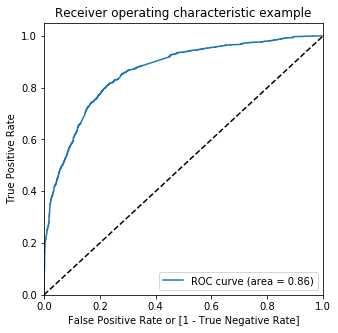

In [279]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [280]:
#here area under the curve of the ROC is 0.88 which shows a good model

In [281]:
# creating columns with different probability cutoffs 

numbers_cut = [float(x)/10 for x in range(10)]
for i in numbers_cut:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted_col,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.315577,0,1,1,1,1,0,0,0,0,0,0
1,0,0.151844,0,1,1,0,0,0,0,0,0,0,0
2,1,0.135876,0,1,1,0,0,0,0,0,0,0,0
3,1,0.278192,0,1,1,1,0,0,0,0,0,0,0
4,1,0.959650,1,1,1,1,1,1,1,1,1,1,1


In [282]:
# creating dataframe with probabiity cutoffs

prob_cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm_1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm_1))
    accuracy = (cm_1[0,0]+cm_1[1,1])/total1
    
    speci = cm_1[0,0]/(cm_1[0,0]+cm_1[0,1])
    sensi = cm_1[1,1]/(cm_1[1,0]+cm_1[1,1])
    prob_cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(prob_cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.538668  0.993485  0.115917
0.2   0.2  0.695584  0.944625  0.464100
0.3   0.3  0.769110  0.876221  0.669550
0.4   0.4  0.789733  0.809214  0.771626
0.5   0.5  0.786819  0.736156  0.833910
0.6   0.6  0.762609  0.635644  0.880623
0.7   0.7  0.739072  0.548162  0.916522
0.8   0.8  0.709931  0.449046  0.952422
0.9   0.9  0.646940  0.286180  0.982266


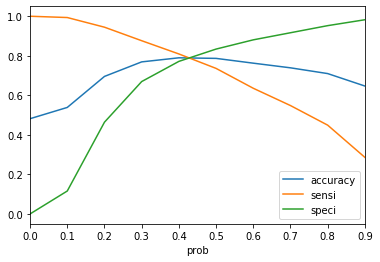

In [283]:
##plotting

prob_cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

# choosinf 0.42 as cut off

In [284]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,predicted_col,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.315577,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.151844,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.135876,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.278192,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.959650,1,1,1,1,1,1,1,1,1,1,1,1


In [285]:
# checking accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7906299036090563

In [286]:
# creating conf matrix

confusion_mat_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_mat_2

array([[1816,  496],
       [ 438, 1711]], dtype=int64)

In [287]:
# checking other matrices
TP = confusion_mat_2[1,1] # for true positive 
TN = confusion_mat_2[0,0] # for true negatives
FP = confusion_mat_2[0,1] # for false positives
FN = confusion_mat_2[1,0] # for false negatives

In [288]:
# Calculating Sensitivity
TP/(TP+FN)

0.7961842717543043

In [289]:
# Calculating Specificity
TN/(TN+FP)

0.7854671280276817

##  Making Predictions on Test Set

In [290]:
# Scaling

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [291]:
X_test = X_test[col_1]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable,Specialization_Select
4771,0.000000,0.000000,1,0,0,0,0,1,0,0,0,1,0,0,0
6122,0.027888,0.029049,0,0,0,0,0,0,0,0,1,0,0,0,0
9202,0.015936,0.416813,0,0,0,0,0,1,0,0,1,0,0,0,0
6570,0.011952,0.378961,0,0,0,1,0,1,0,0,1,0,0,0,0
2668,0.031873,0.395246,0,0,0,0,0,1,0,0,1,0,0,0,0


In [293]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test[col_1])

In [294]:
# Checkimg X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable,Specialization_Select
4771,1.0,0.000000,0.000000,1,0,0,0,0,1,0,0,0,1,0,0,0
6122,1.0,0.027888,0.029049,0,0,0,0,0,0,0,0,1,0,0,0,0
9202,1.0,0.015936,0.416813,0,0,0,0,0,1,0,0,1,0,0,0,0
6570,1.0,0.011952,0.378961,0,0,0,1,0,1,0,0,1,0,0,0,0
2668,1.0,0.031873,0.395246,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.011952,0.027289,0,0,0,0,0,1,0,0,1,0,0,0,0
6583,1.0,0.011952,0.152289,0,0,0,0,0,1,0,0,1,0,0,0,0
5531,1.0,0.055777,0.702025,0,0,0,0,0,0,0,0,1,0,0,0,0
3056,1.0,0.011952,0.417694,0,0,0,1,0,1,0,0,1,0,0,0,0


In [295]:
# Making predictions on test set
y_test_pred = res.predict(X_test_sm)

In [296]:
y_test_pred[:10]

4771    0.996712
6122    0.137945
9202    0.717442
6570    0.311448
2668    0.731041
4233    0.831002
3368    0.645965
9091    0.478119
5972    0.299452
3631    0.796438
dtype: float64

In [297]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [298]:
y_pred_1.head()

,0
4771,0.996712
6122,0.137945
9202,0.717442
6570,0.311448
2668,0.731041


In [299]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [300]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [301]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [302]:
# Checking 'y_pred_final'
y_pred_final.head()

,Converted,0
0,1,0.996712
1,0,0.137945
2,0,0.717442
3,1,0.311448
4,1,0.731041


In [303]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [304]:
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996712
1,0,0.137945
2,0,0.717442
3,1,0.311448
4,1,0.731041


In [305]:
# Making predictions ontest set for 0.45 
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.45 else 0)

In [306]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996712,1
1,0,0.137945,0
2,0,0.717442,1
3,1,0.311448,0
4,1,0.731041,1


In [307]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7902719665271967

In [308]:
confusion_mat_2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion_mat_2

array([[804, 192],
       [209, 707]], dtype=int64)

In [309]:
TP = confusion_mat_2[1,1] 
TN = confusion_mat_2[0,0] 
FP = confusion_mat_2[0,1]
FN = confusion_mat_2[1,0] 

In [310]:
TP / float(TP+FN)

0.7718340611353712

In [311]:
TN / float(TN+FP)

0.8072289156626506

## Precision Recall View

In [312]:
confusion_mat_3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted_col )
confusion_mat_3

array([[1928,  384],
       [ 567, 1582]], dtype=int64)

##### Precision
TP / TP + FP

In [313]:
confusion_mat_3[1,1]/(confusion_mat_3[0,1]+confusion_mat_3[1,1])

0.8046795523906409

##### Recall
TP / TP + FN

In [314]:
confusion_mat_3[1,1]/(confusion_mat_3[1,0]+confusion_mat_3[1,1])

0.7361563517915309

### Precision and recall tradeoff

In [315]:
from sklearn.metrics import precision_recall_curve

In [316]:
y_train_pred_final.Converted, y_train_pred_final.predicted_col

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64, 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: predicted_col, Length: 4461, dtype: int64)

In [317]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

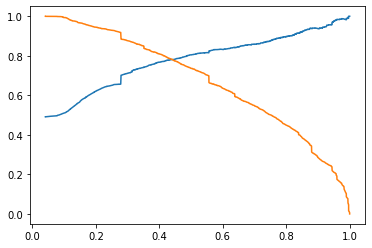

In [318]:
plt.plot(thresholds, p[:-1],)
plt.plot(thresholds, r[:-1],)
plt.show()

In [319]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted_col,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.315577,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.151844,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.135876,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.278192,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.959650,1,1,1,1,1,1,1,1,1,1,1,1


In [320]:
# checking accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7890607487110514

In [321]:
confusion_mat_4 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_mat_4

array([[1841,  471],
       [ 470, 1679]], dtype=int64)

In [322]:
TP = confusion_mat_4[1,1]
TN = confusion_mat_4[0,0] 
FP = confusion_mat_4[0,1] 
FN = confusion_mat_4[1,0] 

In [323]:
TP/(TP+FP)

0.7809302325581395

In [324]:
TP/(TP+FN)

0.7812936249418334

## making predictions on test set

In [325]:
# Make predictions on the test set 
y_test_pred_1 = res.predict(X_test_sm)

In [326]:
y_test_pred_1[:10]

4771    0.996712
6122    0.137945
9202    0.717442
6570    0.311448
2668    0.731041
4233    0.831002
3368    0.645965
9091    0.478119
5972    0.299452
3631    0.796438
dtype: float64

In [327]:
y_pred_1 = pd.DataFrame(y_test_pred_1)

In [328]:
y_pred_1.head()

,0
4771,0.996712
6122,0.137945
9202,0.717442
6570,0.311448
2668,0.731041


In [329]:
y_test_df = pd.DataFrame(y_test)

In [330]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [331]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [332]:
y_pred_final.head()

,Converted,0
0,1,0.996712
1,0,0.137945
2,0,0.717442
3,1,0.311448
4,1,0.731041


In [333]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [334]:
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996712
1,0,0.137945
2,0,0.717442
3,1,0.311448
4,1,0.731041


In [335]:
# Making predictions
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.46 else 0)

In [336]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996712,1
1,0,0.137945,0
2,0,0.717442,1
3,1,0.311448,0
4,1,0.731041,1


In [337]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7913179916317992

In [338]:
confusion_mat_5 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion_mat_5

array([[813, 183],
       [216, 700]], dtype=int64)

In [342]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [339]:
TP = confusion_mat_5[1,1] 
TN = confusion_mat_5[0,0] 
FP = confusion_mat_5[0,1] 
FN = confusion_mat_5[1,0] 

In [340]:
TP/(TP+FP)

0.7927519818799547

In [341]:
TP/(TP+FN)

0.7641921397379913

In [344]:
# checking for features

In [343]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

TotalVisits                                            10.23
Total Time Spent on Website                             4.40
Lead Origin_Lead Add Form                               4.24
Lead Source_Olark Chat                                  1.63
Lead Source_Welingak Website                            2.34
Do Not Email_Yes                                       -1.52
Last Activity_Had a Phone Conversation                  1.17
Last Activity_SMS Sent                                  1.18
What is your current occupation_Housewife              22.61
What is your current occupation_Student                -1.13
What is your current occupation_Unemployed             -1.30
What is your current occupation_Working Professional    1.25
Last Notable Activity_Had a Phone Conversation         23.01
Last Notable Activity_Unreachable                       2.77
Specialization_Select                                  -0.34
dtype: float64

In [345]:
# getting relative coeff

In [346]:
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

TotalVisits                                             44.48
Total Time Spent on Website                             19.14
Lead Origin_Lead Add Form                               18.41
Lead Source_Olark Chat                                   7.09
Lead Source_Welingak Website                            10.19
Do Not Email_Yes                                        -6.60
Last Activity_Had a Phone Conversation                   5.09
Last Activity_SMS Sent                                   5.12
What is your current occupation_Housewife               98.26
What is your current occupation_Student                 -4.89
What is your current occupation_Unemployed              -5.64
What is your current occupation_Working Professional     5.43
Last Notable Activity_Had a Phone Conversation         100.00
Last Notable Activity_Unreachable                       12.02
Specialization_Select                                   -1.48
dtype: float64

In [347]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

TotalVisits                                              5
Total Time Spent on Website                             10
Lead Origin_Lead Add Form                                9
Lead Source_Olark Chat                                  14
Lead Source_Welingak Website                             6
Do Not Email_Yes                                         7
Last Activity_Had a Phone Conversation                  11
Last Activity_SMS Sent                                   3
What is your current occupation_Housewife                4
What is your current occupation_Student                 13
What is your current occupation_Unemployed               2
What is your current occupation_Working Professional     1
Last Notable Activity_Had a Phone Conversation           0
Last Notable Activity_Unreachable                        8
Specialization_Select                                   12
dtype: int64

In [348]:
# ploting features

KeyError: 'Last Notable Activity'

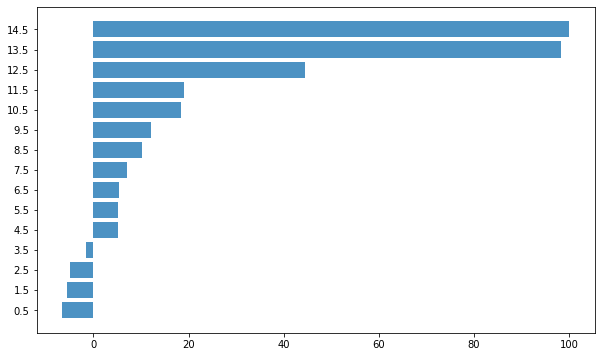

In [352]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx],alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
#featax.set_xlabel('Relative Feature Importance', fontsize=14)

#plt.tight_layout()   
plt.show()

In [353]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
12,Last Notable Activity_Had a Phone Conversation,100.00
8,What is your current occupation_Housewife,98.26
0,TotalVisits,44.48
